In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.ensemble import GradientBoostingClassifier

from models.loader import *
from models.classifiers import *

In [30]:
SEED = 4618
test_sizes = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])
train_sizes = 1 - test_sizes

### Gradient Boosted Model

We run the model 20 times.

The randomness comes from the load_data function: in particular, which subset of the positive class is used. 
We keep this proportion at 0.05, but randomize the sample that is chosen. This is meant to simulate the
differences in quality of data that might occur.

The mean of the result (scores) should give an idea of the (average) rate at which performance improves.

In [268]:
gb_model = GradientBoostingClassifier(
    random_state = SEED, 
    subsample = 0.5)

# Detecting label 15 
#(can change this to anything between 13 and 22, inclusive -- the subcategories within Mechanical & Civil Engineering)
scores, X, y, vocab = simulate(
    model = gb_model, 
    label = 15, 
    target_p = 0.05, 
    test_sizes = test_sizes, 
    n = 20, 
    random_state = SEED)

##### Explore Vocabulary

In [269]:
y.index = range(len(y))

In [270]:
def print_sample_vocab(cl):
    if cl == 'pos':
        idx = random.sample(list(y[y==1].index), 1)[0]
    elif cl == 'neg':
        idx = random.sample(list(y[y==0].index), 1)[0]
    else:
        pass
    
    words = np.array(vocab)[np.array(X[idx].todense() != 0)[0]]
    print(' '.join(words))

In [273]:
# Example: documents in class 15
print_sample_vocab(cl='pos')
print('----------------------')
print_sample_vocab(cl='pos')
print('----------------------')
print_sample_vocab(cl='pos')
print('----------------------')

algorithm applic approxim calcul certain combin design discuss estim forecast formal fraction genet model number numer perform possibl power problem product seri shown simul solut step task time use
----------------------
ad adopt aerospac analysi appli approach case concurr conduct current design effici enabl engin establish global inform integr investig manner manufactur method oper paper plan practic present process product progress research simultan state stream studi team understand valu
----------------------
addit advers allow analys basic becom begin busi carbon case caus challeng commerci compani competit content day deplet design develop direct divers drive econom effect energi engin enterpris environ environment exist extend futur global great green growth human increas indic industri inform innov integr issu law main manag manufactur methodolog model natur need new order owe paper paradigm perform pollut present pressur primarili process product rang regul reinforc resourc 

In [274]:
# Example: documents not in class 15
print_sample_vocab(cl='neg')
print('----------------------')
print_sample_vocab(cl='neg')
print('----------------------')
print_sample_vocab(cl='neg')
print('----------------------')

ani common consum control cost current design digit effici energi equip final focus high implement logic low machin medic power reduc research scienc scientist seri shift speed standard termin tradit transistor treatment trend use voltag work
----------------------
adopt applic assist bridg compens compon correspond cost decreas drawback effici factor flux general high howev increas induct introduc invert investig iron low machin magnet main materi mean optim paper perman pm power proper rate recent reluct requir respect rotor satur second select sever synchron torqu variabl volum year
----------------------
analysi articl aspect cell common complex comput consid context converg coupl deform domain dynam equat estim exist flow fluid formul geometri heterogen high highlight illustr inde induc interact linear main mechan media model numer obstacl order origin paper physic plasma porous practic present problem quit regular requir result simul solut studi surround togeth track uniqu variab

In [275]:
n_docs = len(y)
n_pos = sum(y==1)
print("Total number of documents: {}".format(n_docs))
print("Numer of documents in Class 15: {}".format(n_pos))

Total number of documents: 3888
Numer of documents in Class 15: 202


##### Visualize

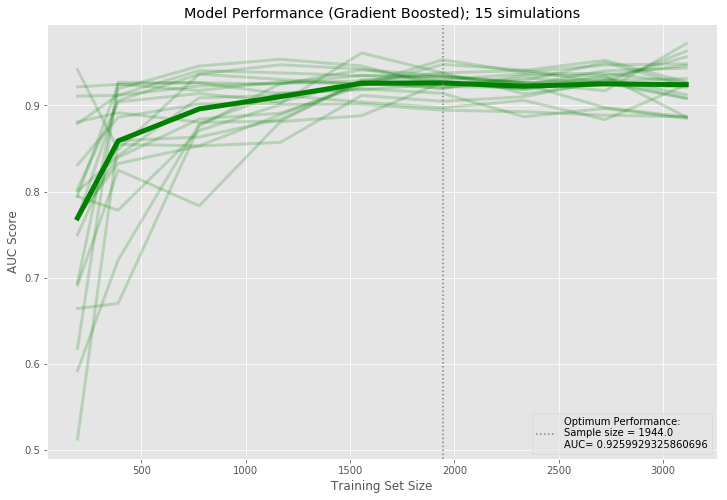

In [277]:
fig, ax = plt.subplots(figsize=(12, 8))

for iteration in scores:
    ax.plot(train_sizes*n_docs, iteration, alpha = 0.2, color = 'g', linewidth=3)
    
ax.plot(train_sizes*n_docs, np.mean(scores, axis=0), color = 'g', linewidth=5, )

optimum_idx = np.argmax(np.mean(scores, axis=0))
optimum = (train_sizes*n_docs)[optimum_idx]
opt_auc = np.mean(scores, axis = 0)[optimum_idx]
ax.axvline(
    x = optimum, 
    color = 'grey', 
    linestyle = ':', 
    label = 'Optimum Performance: \nSample size = {}\nAUC= {}'.format(optimum, opt_auc))

ax.set_xlabel('Training Set Size')
ax.set_ylabel('AUC Score')
ax.legend()
_ = ax.set_title('Model Performance (Gradient Boosted); 15 simulations')

In [279]:
plt.savefig('img/gb_simulation.png')